# Gradient Descent

###### Andrew Cachia, Nov 2018

#### Imports

In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML

#### Cost Function

$$ 4x^4 - 3x^2 + 2x - 1 $$

In [2]:
def cost_function(x):
    return 4*x**(4) - 3*x**(2) + 2*x - 1

#### Derivative

$$ 16x^3 - 6x + 2 $$

In [3]:
def derivative(x):
    return 16*x**(3) - 6*x + 2

#### Variables

In [4]:
alpha = 0.075
error_threshold = 0.01
initial_P = 1

#### Execution and plotting

In [5]:
X = np.linspace(-1.5, 1.5, 50, endpoint=True)
Y = cost_function(X);

x_gd = []
y_gd = []

P = initial_P;
dp = derivative(P);
count = 0;

while abs(dp) > error_threshold and count < 100:
    count = count+1
    dp = derivative(P)
    P = P - alpha * dp
    y = cost_function(P)
    x_gd.append(P)
    y_gd.append(y)
    print("{} - P: {}; \tdP: {}; \tY: {}".format(count,P,dp,y))

1 - P: 0.10000000000000009; 	dP: 12; 	Y: -0.8295999999999999
2 - P: -0.006199999999999872; 	dP: 1.4159999999999995; 	Y: -1.0125153140894654
3 - P: -0.15898971400639983; 	dP: 2.0371961867519994; 	Y: -1.3912567611263977
4 - P: -0.3757124065934553; 	dP: 2.88963590116074; 	Y: -2.0951998799673666
5 - P: -0.6311403981324395; 	dP: 3.4057065538531237; 	Y: -2.8226021095456106
6 - P: -0.763464779492848; 	dP: 1.764325084805447; 	Y: -2.9165757266157026
7 - P: -0.7230153116152164; 	dP: -0.5393262383684219; 	Y: -2.9212090247641096
8 - P: -0.744823707060727; 	dP: 0.29077860594014115; 	Y: -2.922889397596564
9 - P: -0.7341541910492454; 	dP: -0.14226021348642082; 	Y: -2.923247503235557
10 - P: -0.7396881725237267; 	dP: 0.07378641965974975; 	Y: -2.923349564837479
11 - P: -0.7368935153717122; 	dP: -0.03726209536019276; 	Y: -2.923374830934519
12 - P: -0.7383251245424851; 	dP: 0.01908812227697254; 	Y: -2.923381561829636
13 - P: -0.7375969456330039; 	dP: -0.009709052126415152; 	Y: -2.9233832898740517


<IPython.core.display.Javascript object>


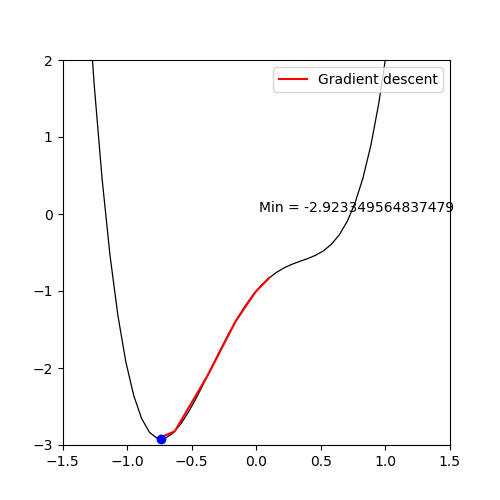

In [8]:
%matplotlib notebook
fig = plt.figure(figsize=(5,5))
ax = plt.axes(xlim=(-1.5,1.5), ylim=(-3,2))

ax.plot(X, Y, lw = 0.9, color = 'k')

line, = ax.plot([], [], 'r', label = 'Gradient descent', lw = 1.5)
point, = ax.plot([], [], 'bo')
value_display = ax.text(0.02, 0.02, '')

def init():
    line.set_data([], [])
    point.set_data([], [])
    value_display.set_text('')

    return line, point, value_display

def animate(i):
    line.set_data(x_gd[:i], y_gd[:i])
    point.set_data(x_gd[i], y_gd[i])
    value_display.set_text('Min = ' + str(y_gd[i]))

    return line, point, value_display

ax.legend(loc = 1)
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(x_gd)-1, interval=120, 
                               repeat_delay=10, blit=True)

plt.show()